In [1]:
#import pandas
import os
import numpy
#import itertools
import cv2
from train.train_ccae_model import CandlestickEncoder

Using TensorFlow backend.
/home/ubuntu/.pyenv/versions/3.7.3/envs/qiita_12/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.pyenv/versions/3.7.3/envs/qiita_12/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.pyenv/versions/3.7.3/envs/qiita_12/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

In [2]:
img_filepath_list = os.listdir("data/img/train/ccae_train")
img_filepath = "data/img/train/ccae_train/{}".format(img_filepath_list[0])
print(img_filepath)
model_filepath = "data/ccae/best_model.h5"
model = CandlestickEncoder(model_filepath)
print(model.shape)
img_arr = cv2.imread(img_filepath, 0)
img_arr.resize(model.shape[0], model.shape[1], 1)
arr = img_arr.reshape(1, model.shape[0], model.shape[1], model.shape[2])

data/img/train/ccae_train/2120_2016-07-21_2016-12-05.png









(64, 64, 1)


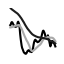

In [3]:
from PIL import Image
Image.fromarray(img_arr.reshape((64, 64)))

In [4]:
img_arr2 = model.predict_encoder_decoder(arr/255.0)
import matplotlib.pyplot as plt

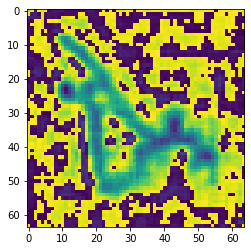

In [5]:
a =(img_arr2[0]*255).astype("uint8").reshape((64, 64))
plt.imshow(a)